[168.95619175621437, 153.59401181610662, 151.71950368232797, 146.8428536155445, 142.06871571232702, 138.4954345823115, 137.1774210507484, 136.21087779426878, 136.0204980619319, 135.65438319205325, 130.8802452888358, 129.9283466271513, 129.59152094686297, 129.4743641885018, 128.08312768296298, 127.54127767554259, 127.14587361607366, 126.91156009935132, 49.500232012211654, 35.441421008871856, 31.458091224592266, 127.42412091718141, 35.41213181928157, 35.36819803489615] 24


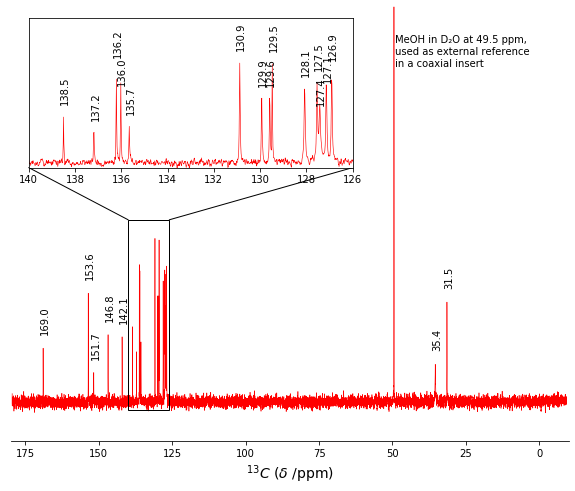

In [142]:
#! /usr/bin/env python
# Create a plot of overlayed 2D spectra

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import nmrglue as ng
import numpy as np

def draw_inset(co_or, z_x, z_y):
    ax_temp = fig.add_axes(co_or)
    #ax_temp.spines['top'].set_color('white')
    #ax_temp.spines['left'].set_color('white')
    #ax_temp.spines['right'].set_color('white')
    ax_temp.axes.get_yaxis().set_visible(False)
    ax_temp.plot(ppm_scale, data, 'red' , linewidth =0.6)
    ax_temp.set_xlim(z_x[0], z_x[1])
    ax_temp.set_ylim(z_y[0], z_y[1])
    width=z_x[0]-z_x[1]
    height=0.8*z_y[1]
    rect = patches.Rectangle((z_x[1],z_y[0]), width, height, linewidth=1, edgecolor='k', facecolor='none', zorder=10)
    line1 = patches.ConnectionPatch((z_x[1],z_y[0]), (z_x[1],z_y[0]+height), coordsA='data', coordsB='data',
                                    axesA=ax_temp, axesB=ax1, color="black")
    line2 = patches.ConnectionPatch((z_x[0],z_y[0]), (z_x[0],z_y[0]+height), coordsA='data', coordsB='data',
                                    axesA=ax_temp, axesB=ax1, color="black")
    ax1.add_patch(rect)
    ax1.add_artist(line1)
    ax1.add_artist(line2)
    return ax_temp

fname = "C:/Users/User/Desktop/NMR/300/MS124-300/2/pdata/1"
dic, data = ng.bruker.read_pdata(fname)

udic = ng.bruker.guess_udic(dic, data)
uc0 = ng.fileiobase.uc_from_udic(udic)
ppm_scale = uc0.ppm_scale()

limit_x=[180,-10]
limit_y=[-5e4,5e5]
label_x = '$^{13}C$'+' '+'$(\delta$'+' '+'/ppm)'
inset_co = [(0.15, 0.6, 0.45, 0.26)] #left, bottom, width, height
zoom_x=[(140,126)]
zoom_y=[(-1e4,3e5)]

fig = plt.figure(figsize=(10,8),constrained_layout=False)

ax1 = fig.add_subplot(111)
ax1.plot(ppm_scale, data, 'red' , linewidth =0.6, zorder=1)
ax1.set_xlim(limit_x[0], limit_x[1])
ax1.set_ylim(limit_y[0], limit_y[1])

thres=30000 #threshold for peakpicking

#dummy=[thres for i in range(len(ppm_scale))]
#ax1.plot(ppm_scale, dummy, 'b')

# Decorate
# Remove spines or the box around the plot (but leave the x-axis line)
ax1.spines['top'].set_color('white')
ax1.spines['left'].set_color('white')
ax1.spines['right'].set_color('white')
ax1.axes.get_yaxis().set_visible(False) # Remove y-axis
ax1.set_xlabel(label_x, fontsize=14) # Label the x-axis

# perform peak picking
peak_table = ng.peakpick.pick(data, thres, table=False, algorithm='downward')
#print(len(peak_table[0]))
peaks=[]
label_y=[] #this is to automatically position the peak label
additional_peaks=[] #for any peaks that were not picked up by automatic peak picking
dont_print=[49.500232012211654, 35.41213181928157, 35.36819803489615]
additional_y=[20000,20000,20000,20000,
             20000,30000,30000,50000,
             0,30000,30000,30000,
             30000,30000,30000,30000,
             10000,45000,20000,20000,
             20000,1000,20000,20000,]

for each in peak_table[0]:
    #print(each, ppm_scale[each])
    peaks.append(ppm_scale[each])
    label_y.append(data[each])
print(peaks, len(peaks))

# label peaks
for x,y, y1 in zip(peaks, label_y, additional_y):
    if x in dont_print:
        pass
    elif x < zoom_x[0][0] and x > zoom_x[0][1]:
        pass
    else:
        new_x=x+1
        new_y=y+y1
        ax1.text(new_x, new_y, "{:0=3.1f}".format(x), rotation=90, fontsize = 10)

for a,b,c in zip(inset_co, zoom_x, zoom_y):
    axin = draw_inset(a,b,c)
    for x,y,y1 in zip(peaks, label_y, additional_y):
        new_x=x+0.15
        new_y=y+y1
        if x in dont_print:
            pass
        elif x < b[0] and x > b[1]:
            axin.text(new_x, new_y, "{:0=3.1f}".format(x), rotation=90, fontsize = 10)

    
text = 'MeOH in D\u2082O at 49.5 ppm,'+'\n'+'used as external reference'+'\n'+'in a coaxial insert'
ax1.text(49, limit_y[1]-75000, text)

plt.show()
fig.savefig('MS124_13C_zoom_aromatic.png', dpi=120, bbox_inches='tight', pad_inches=0)